# Sample code for Question 1

This notebook shows how you can use the provided Python function to pull player stats from an online website.
This function lives in a custom package that is provided to you in this repository.
You are encouraged to leverage this package as a skeleton and add all of your reusable code, functions, etc. into relevant modules.
This makes collaboration much easier as the package could be seen as a "single source of truth" to pull data, create visualizations, etc. rather than relying on a jumble of notebooks.
You can still run into trouble if branches are not frequently merged as work progresses, so try to not let your branches diverge too much.

In [1]:
from ift6758.data import get_player_stats

If the above doesn't work for you, make sure you've installed the repo as specified in the readme file. 
Essentially you must make sure that your environment is setup (either through conda or virtualenv), and then install it using:

```bash
pip install -e /path/to/repo 
```

The nice thing using this approach is if you have your environment activated, you can import modules from anywhere on your system!

In [2]:
df = get_player_stats(2016, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2016_goalies.html'...


If you're curious, this function uses the `pd.read_html()` method ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)), which internally uses [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse HTML data.

In [3]:
df.head()

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,...,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
0,1,Jake Allen,25,STL,47,44,26,15,3,101,...,2583,26,.591,6,94,6.28,0,0,0,0
1,2,Frederik Andersen,26,ANA,43,37,22,9,7,88,...,2298,24,.649,5,95,4.46,0,1,1,2
2,3,Craig Anderson,34,OTT,60,60,31,23,5,161,...,3477,31,.517,8,99,2.05,0,2,2,0
3,4,Richard Bachman,28,VAN,1,1,1,0,0,3,...,60,0,.000,0,NaN,NaN,0,0,0,0
4,5,Niklas Bäckström,37,CGY,4,3,2,2,0,13,...,233,2,.667,1,NaN,NaN,0,0,0,0


# Data Acquisition

download raw data from https://statsapi.web.nhl.com/api/v1/game/[GAME_ID]/feed/live/
manual load into dataframe

Example usage shown and commented below

In [4]:
#imports
from ift6758.data.functions import loadstats
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import pandas as pd
import json
import numpy as np

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [5]:

#preload and download from web if not acquired (set to false to download all data)
downloaded = False
if not downloaded:
    datayear = 2016
    while datayear <= 2021:
        loadstats(datayear,'./data/')
        datayear += 1
    
#outputs games that aren't played up to 7 in playoffs or max games in regular season
dfs = loadstats(2019,'./data/')
# print(df2019.iloc[:,1270])
# print(df2019['2019020001'])

Error code: 404 at gameID:2016021231. Game not found.
size of data in regular season: 1230
Error code: 404 at gameID:2016030147. Game not found.
Error code: 404 at gameID:2016030176. Game not found.
size of data in regular season & playoffs: 1332
size of data in regular season: 1271
size of data in regular season & playoffs: 1376
size of data in regular season: 1271
size of data in regular season & playoffs: 1376
size of data in regular season: 1271
Error code: 404 at gameID:2019030007. Game not found.
Error code: 404 at gameID:2019030017. Game not found.
Error code: 404 at gameID:2019030026. Game not found.
Error code: 404 at gameID:2019030036. Game not found.
Error code: 404 at gameID:2019030046. Game not found.
Error code: 404 at gameID:2019030056. Game not found.
Error code: 404 at gameID:2019030066. Game not found.
Error code: 404 at gameID:2019030076. Game not found.
Error code: 404 at gameID:2019030086. Game not found.
Error code: 404 at gameID:2019030096. Game not found.
size o

In [6]:
# playbyplay shown
pd.DataFrame.from_dict(dfs['2019020001']['liveData']['plays']['allPlays']).head()

,result,about,coordinates,players,team
0,"{'event': 'Game Scheduled', 'eventCode': 'TOR1...","{'eventIdx': 0, 'eventId': 1, 'period': 1, 'pe...",{},NaN,NaN
1,"{'event': 'Period Ready', 'eventCode': 'TOR5',...","{'eventIdx': 1, 'eventId': 5, 'period': 1, 'pe...",{},NaN,NaN
2,"{'event': 'Period Start', 'eventCode': 'TOR8',...","{'eventIdx': 2, 'eventId': 8, 'period': 1, 'pe...",{},NaN,NaN
3,"{'event': 'Faceoff', 'eventCode': 'TOR9', 'eve...","{'eventIdx': 3, 'eventId': 9, 'period': 1, 'pe...","{'x': 0.0, 'y': 0.0}","[{'player': {'id': 8475166, 'fullName': 'John ...","{'id': 10, 'name': 'Toronto Maple Leafs', 'lin..."
4,"{'event': 'Goal', 'eventCode': 'TOR10', 'event...","{'eventIdx': 4, 'eventId': 10, 'period': 1, 'p...","{'x': 85.0, 'y': -1.0}","[{'player': {'id': 8480801, 'fullName': 'Brady...","{'id': 9, 'name': 'Ottawa Senators', 'link': '..."


In [7]:
# raw data shown in first entry
dfs

,2019020001,2019020002,2019020003,2019020004,2019020005,2019020006,2019020007,2019020008,2019020009,2019020010,...,2019030325,2019030326,2019030327,2019030411,2019030412,2019030413,2019030414,2019030415,2019030416,2019030417
copyright,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...
gamePk,2019020001,2019020002,2019020003,2019020004,2019020005,2019020006,2019020007,2019020008,2019020009,2019020010,...,2019030325,2019030326,2019030327,2019030411,2019030412,2019030413,2019030414,2019030415,2019030416,2019030417
link,/api/v1/game/2019020001/feed/live,/api/v1/game/2019020002/feed/live,/api/v1/game/2019020003/feed/live,/api/v1/game/2019020004/feed/live,/api/v1/game/2019020005/feed/live,/api/v1/game/2019020006/feed/live,/api/v1/game/2019020007/feed/live,/api/v1/game/2019020008/feed/live,/api/v1/game/2019020009/feed/live,/api/v1/game/2019020010/feed/live,...,/api/v1/game/2019030325/feed/live,/api/v1/game/2019030326/feed/live,/api/v1/game/2019030327/feed/live,/api/v1/game/2019030411/feed/live,/api/v1/game/2019030412/feed/live,/api/v1/game/2019030413/feed/live,/api/v1/game/2019030414/feed/live,/api/v1/game/2019030415/feed/live,/api/v1/game/2019030416/feed/live,/api/v1/game/2019030417/feed/live
metaData,"{'wait': 10, 'timeStamp': '20191106_204348', '...","{'wait': 10, 'timeStamp': '20191106_204355'}","{'wait': 10, 'timeStamp': '20191106_204404'}","{'wait': 10, 'timeStamp': '20191106_204412'}","{'wait': 10, 'timeStamp': '20191106_204420'}","{'wait': 10, 'timeStamp': '20191106_204429'}","{'wait': 10, 'timeStamp': '20191106_204438'}","{'wait': 10, 'timeStamp': '20191106_204446'}","{'wait': 10, 'timeStamp': '20191106_204455'}","{'wait': 10, 'timeStamp': '20191106_204502'}",...,"{'wait': 10, 'timeStamp': '20200915_145520'}","{'wait': 10, 'timeStamp': '20200915_030341'}","{'wait': 10, 'timeStamp': '20200915_030342'}","{'wait': 10, 'timeStamp': '20200921_213742'}","{'wait': 10, 'timeStamp': '20200922_040018'}","{'wait': 10, 'timeStamp': '20200924_053615'}","{'wait': 10, 'timeStamp': '20201012_000003'}","{'wait': 10, 'timeStamp': '20200927_185956'}","{'wait': 10, 'timeStamp': '20200929_092143'}","{'wait': 10, 'timeStamp': '20200922_000343'}"
gameData,"{'game': {'pk': 2019020001, 'season': '2019202...","{'game': {'pk': 2019020002, 'season': '2019202...","{'game': {'pk': 2019020003, 'season': '2019202...","{'game': {'pk': 2019020004, 'season': '2019202...","{'game': {'pk': 2019020005, 'season': '2019202...","{'game': {'pk': 2019020006, 'season': '2019202...","{'game': {'pk': 2019020007, 'season': '2019202...","{'game': {'pk': 2019020008, 'season': '2019202...","{'game': {'pk': 2019020009, 'season': '2019202...","{'game': {'pk': 2019020010, 'season': '2019202...",...,"{'game': {'pk': 2019030325, 'season': '2019202...","{'game': {'pk': 2019030326, 'season': '2019202...","{'game': {'pk': 2019030327, 'season': '2019202...","{'game': {'pk': 2019030411, 'season': '2019202...","{'game': {'pk': 2019030412, 'season': '2019202...","{'game': {'pk': 2019030413, 'season': '2019202...","{'game': {'pk': 2019030414, 'season':

In [8]:
# number of regular season games
print(dfs.iloc[:,0]['metaData']['playoffIndex'])
# number of total games
print(dfs.shape[1])

1271
1428


# Interactive Debugging Widget

Use the sliders below to see the play by play for each games

In [9]:
def coordToImg (x, y):
    #transforms coordinate from data to image coordinates

    #data coordinates [-42.5,42.5,-100 ,100]  85 by 200
    y = y*(467/85)
    x = x*(1100/200)
    #scale [-233.5,233.5,-550,550]
    
    y = y+233.5
    x = x + 550
    #shift [0,467,0,1100]

    return int(x), int(y)

In [10]:
#define the playoff index & game size
index = dfs.iloc[:,0]['metaData']['playoffIndex']
gamesize = dfs.shape[1]
# number of plays in game 1 regular season
game1plays = len(dfs.iloc[:,0]['liveData']['plays']['allPlays'])

#game type selector
wType = widgets.RadioButtons(
        options=['Regular', 'PlayOffs'],
        value='Regular', # Defaults to 'Regular'
        #layout={'width': 'max-content'}, # If the items' names are long
        description='Game Type:',
        disabled=False
    )
    
#game selector
wGameIndex = widgets.IntSlider(
    value=0,
    min=0,
    max=index-1,
    step=1,
    description='Game Index:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

#play selector
wPlays = widgets.IntSlider(
        value=0,
        min=0,
        max=game1plays-1,
        step=1,
        description='Play Index:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
)


output2 = widgets.Output()
#debug
#display(wType,wGameIndex,wPlays,output2)

# Define a function that updates the content of GameIndex based on GameType
def on_value_changeT(change):
    if wType.value == 'Regular':
        wGameIndex.min = 0
        wGameIndex.max = max(index-1,0)
        wGameIndex.value=0
    elif wType.value == 'PlayOffs':
        wGameIndex.max = max(gamesize-1,0)
        wGameIndex.min = min(index,0)
        wGameIndex.value = min(wGameIndex.max,wGameIndex.min)
    else:
        print('Game Type Selector Error!')
    #debug
    # with output2:
    #     print(change['new'])
    #     print(wGameIndex.min)
    #     print(wGameIndex.max)

wType.observe(on_value_changeT, names='value')

# Define a function that updates the number of Plays based on GameIndex
def on_value_changeI(change):
    wPlays.value = 0
    wPlays.max = max(len(dfs.iloc[:,wGameIndex.value]['liveData']['plays']['allPlays'])-1,0)
    #debug 
    # with output2:
    #     print(change['new'])
    #     print(wPlays.max)
    #     print(wPlays.value)
        
wGameIndex.observe(on_value_changeI, names='value')

#functions that plots the plays depending on the widget selection
def plotPlay(wTypei, wGameIndexi,wPlaysi):
    
    coordinates = {}
    #print useful info here
    print(f'Gametype: {wTypei}, Game Index: {wGameIndexi}, Play Index: {wPlaysi}')
    print(f'gameID: {dfs.iloc[:,wGameIndexi]["gamePk"]}, time: {dfs.iloc[:,wGameIndexi]["gameData"]["datetime"]["dateTime"]}')
    print(f'Away: {dfs.iloc[:,wGameIndexi]["gameData"]["teams"]["away"]["abbreviation"]} vs {dfs.iloc[:,wGameIndexi]["gameData"]["teams"]["home"]["abbreviation"]} :Home')
    
    #try to find coordinates of plays
    try:
        coordinates = dfs.iloc[:,wGameIndexi]['liveData']['plays']['allPlays'][wPlaysi]['coordinates']
    except Exception as ex:
        print(ex)
    

    #change coordinate system and show image
    img = mpimg.imread('./figures/nhl_rink.png')
    imgplot = plt.imshow(img)#, extent = [-100 ,100,-42.5,42.5])
    
    #if coordinates exist then plot on image
    if coordinates:
        x, y = coordToImg(coordinates['x'],coordinates['y'])
        plt.plot(x,y,'yo', markersize=30)
        #plt.plot(coordinates['x'],coordinates['y'],'yo', markersize=30)
    plt.show()
    
    #print play info if it exist
    try:
        print(json.dumps(dfs.iloc[:,wGameIndexi]['liveData']['plays']['allPlays'][wPlaysi], ensure_ascii=False, indent=4))
    except Exception as ex:
        print(ex)
    
#widget initilizer
widgets.interact(plotPlay,  
    #game type selector
    wTypei = wType,    
    #game selector
    wGameIndexi = wGameIndex,    
    #play selector
    wPlaysi = wPlays,
)



interactive(children=(RadioButtons(description='Game Type:', options=('Regular', 'PlayOffs'), value='Regular')…

<function __main__.plotPlay(wTypei, wGameIndexi, wPlaysi)>

In [45]:
import numpy as np
import pandas as pd
from ift6758.data.functions import loadstats
def tidyData(dfs: pd.DataFrame) -> pd.DataFrame:
    """
    Tidy the json-df downloaded with loadstats() and return a tidy df ready to use..
    Parameters
    ----------
    dfs : pd.DataFrame
        json-df downloaded with loadstats()
    Returns
    -------
    pd.DataFrame
        pandas DataFrame of the play-by-play data where each row is an play event.
        "For this milestone, you will want to include events of the type “shots” and “goals”.
        You can ignore missed shots or blocked shots for now.
        For each event, you will want to include as features (at minimum):
        game time/period information - period, periodTime
        game ID - game_id
        team information (which team took the shot) - teamInfo
        indicator if its a shot or a goal - isGoal
        the on-ice coordinates - coordinates_x, coordinates_y
        the shooter and goalie name (don’t worry about assists for now) - shooter, goalie
        shot type - shotType
        if it was on an empty net - emptyNet
        and whether or not a goal was at even strength,
        shorthanded, or on the power play."
        homeTeam,awayTeam names
    Examples
    --------
    dfs = loadstats(2019,'./data/')
    df = tidyData(dfs)
    """
    rows_list, event_idx, game_id, period, periodTime, teamInfo, isGoal, shotType, \
    coordinates_x, coordinates_y, shooter, goalie, emptyNet, strength,homeTeam,awayTeam = ([] for i in range(16))

    for j in range(dfs.shape[1]): # dfs.shape[1]
        allPlays = dfs.iloc[:, j]["liveData"]["plays"]["allPlays"]
        for event in allPlays:
            # search for events that are 'shot' or 'goal'
            if event['result']['eventTypeId'] == "SHOT":
                rows_list.append(event)
                game_id.append(dfs.iloc[:, j].name)
                strength.append('NA')
                awayTeam.append(dfs.iloc[:, j]['gameData']['teams']['away']['name'])
                homeTeam.append(dfs.iloc[:, j]['gameData']['teams']['home']['name'])
            if event['result']['eventTypeId'] == "GOAL":
                rows_list.append(event)
                game_id.append(dfs.iloc[:, j].name)
                strength.append(event['result']['strength']['code'])
                awayTeam.append(dfs.iloc[:, j]['gameData']['teams']['away']['name'])
                homeTeam.append(dfs.iloc[:, j]['gameData']['teams']['home']['name'])


            # count += 1

    toCheck = [rows_list, strength, game_id,awayTeam, homeTeam]

    if len({len(i) for i in toCheck}) == 1:
        df = pd.DataFrame(rows_list)
    #print(df)
    for i in range(df.shape[0]):

        event_idx.append(df['about'][i]['eventIdx'])
        period.append(df['about'][i]['period'])
        periodTime.append(df['about'][i]['periodTime'])
        teamInfo.append(df['team'][i]['name'])
        isGoal.append(df['result'][i]['eventTypeId'] == "GOAL")

        # coordinates_x.append(df['coordinates'][i]['x'])
        # coordinates_y.append(df['coordinates'][i]['y'])

        if 'secondaryType' in df['result'][i]:
            shotType.append(df['result'][i]['secondaryType'])
        else:
            shotType.append(pd.NA)

        if 'x' in df['coordinates'][i]:
            coordinates_x.append(df['coordinates'][i]['x'])
        else:
            coordinates_x.append(pd.NA)

        if 'y' in df['coordinates'][i]:
            coordinates_y.append(df['coordinates'][i]['y'])
        else:
            coordinates_y.append(pd.NA)


        shooter_count = 0
        goalie_count = 0
        for player_info in df['players'][i]:

            if player_info['playerType'] == 'Scorer' or player_info['playerType'] == 'Shooter':
                shooter.append(player_info['player']['fullName'])
                shooter_count += 1

            if player_info['playerType'] == 'Goalie':
                goalie.append(player_info['player']['fullName'])
                goalie_count += 1

        if 'emptyNet' in df['result'][i] and df['result'][i]['emptyNet'] == True:
            emptyNet.append(True)
            goalie.append("EmptyNet") # When there is no goalie, return "EmptyNet", or maybe pd.NA?
            goalie_count += 1
            # print("emptyNet = True")
            # print(" i ", i)
            # print(" game_id", game_id[i])
            # print(df['about'][i]['eventIdx'], "event idx \n")
        else:
            emptyNet.append(False)

        if not ('emptyNet' in df['result'][i] and df['result'][i]['emptyNet'] == True) and (shooter_count > 0 and goalie_count == 0):
            # print("shooter_count not equal to goalie_count")
            # print("i ", i)
            # print("game_id", game_id[i])
            # print(df['about'][i]['eventIdx'], "event idx \n")
            # print("score, not emptyNet, but no goalie! Add goalie as pd.NA")
            goalie.append(pd.NA)
            goalie_count += 1

        if shooter_count != goalie_count:
            raise ValueError("shooter_count not equal to goalie_count")
        # score, not emptyNet, no goalie, 2019020575 335

        # 283 event idx



        # toCheck = [game_id, rows_list, strength, event_idx, shooter, goalie]
        # it = iter(toCheck)
        # the_len = len(next(it))
        # if not all(len(l) == the_len for l in it):

        #     for lst in toCheck:
        #         print(lst, "\n")
        #     raise ValueError('not all lists have same length!')

    #shorthand check if all lens are equal
    assert(all(len(lst) == len(event_idx) for lst in [event_idx, period, periodTime, teamInfo, isGoal,
               shotType, coordinates_x, coordinates_y, shooter, goalie, emptyNet, strength, awayTeam, homeTeam]) )

    df2 = pd.DataFrame(np.column_stack([game_id, event_idx, period, periodTime, teamInfo, isGoal,
                                        shotType, coordinates_x, coordinates_y, shooter, goalie, emptyNet, strength, awayTeam, homeTeam]),
                       columns=['game_id', 'event_idx', 'period', 'periodTime', 'teamInfo', 'isGoal',
                                'shotType', 'coordinates_x', 'coordinates_y', 'shooter', 'goalie', 'emptyNet','strength', 'awayTeam', 'homeTeam'])

    return df2

# loading the data
dfs_2018 = loadstats(2018,'./data/')
df_2018 = tidyData(dfs_2018)

#print(df_2018)
dfs_2019 = loadstats(2019,'./data/')
df_2019 = tidyData(dfs_2019)

dfs_2020 = loadstats(2020,'./data/')
df_2020 = tidyData(dfs_2020)


size of data in regular season: 1271
size of data in regular season & playoffs: 1376
size of data in regular season: 1271
Error code: 404 at gameID:2019030007. Game not found.
Error code: 404 at gameID:2019030017. Game not found.
Error code: 404 at gameID:2019030026. Game not found.
Error code: 404 at gameID:2019030036. Game not found.
Error code: 404 at gameID:2019030046. Game not found.
Error code: 404 at gameID:2019030056. Game not found.
Error code: 404 at gameID:2019030066. Game not found.
Error code: 404 at gameID:2019030076. Game not found.
Error code: 404 at gameID:2019030086. Game not found.
Error code: 404 at gameID:2019030096. Game not found.
size of data in regular season & playoffs: 1428
Error code: 404 at gameID:2020020869. Game not found.
size of data in regular season: 868
size of data in regular season & playoffs: 973


<b><h2>Simple Visualizations (25%) </h2> </b> 

Lets now use the tidied data to create some simple distributions over the aggregate data.

Questions 

1) Produce a histogram OR BARPLOT of shot types over all teams in a season of your choosing. Overlay the number of goals overtop the number of shots. What appears to be the most dangerous type of shot? The most common type of shot? Add this figure and discussion to your blog post.

2) What is the relationship between the distance a shot was taken and the chance it was a goal? Produce a figure for each season between 2018-19 to 2020-21 to answer this, and add it to your blog post along with a couple of sentences describing your figure. Has there been much change over the past three seasons? Note: there are multiple ways to show this relationship! If your figure tells the correct story, you will get full marks.

3) Combine the information from the previous sections to produce a figure that shows the goal percentage (# goals / # shots) as a function of both distance from the net, and the category of shot types (you can pick a single season of your choice). Briefly discuss your findings; e.g. what might be the most dangerous types of shots?


In [83]:
df2 = df_2019.groupby(['shotType'])['isGoal'].value_counts().reset_index(name='count')

In [84]:
df2 = df2.rename(columns={'count': 'Goal'})
print(df2)

       shotType  isGoal   Goal
0      Backhand   False   5422
1      Backhand    True    738
2     Deflected   False   1275
3     Deflected    True    229
4     Slap Shot   False  10371
5     Slap Shot    True    767
6     Snap Shot   False   9159
7     Snap Shot    True   1087
8        Tip-In   False   3389
9        Tip-In    True    678
10  Wrap-around   False    648
11  Wrap-around    True     52
12   Wrist Shot   False  38990
13   Wrist Shot    True   3802


In [85]:
df2 = df2[df2['isGoal'] == 1]
df2

,shotType,isGoal,Goal
1,Backhand,True,738
3,Deflected,True,229
5,Slap Shot,True,767
7,Snap Shot,True,1087
9,Tip-In,True,678
11,Wrap-around,True,52
13,Wrist Shot,True,3802


      shotType   Shot
0     Backhand   7003
1    Deflected   1679
2    Slap Shot  12247
3    Snap Shot  11961
4       Tip-In   4501
5  Wrap-around    887
6   Wrist Shot  47633


Text(0.5, 1.0, 'Stacked Bar Chart')

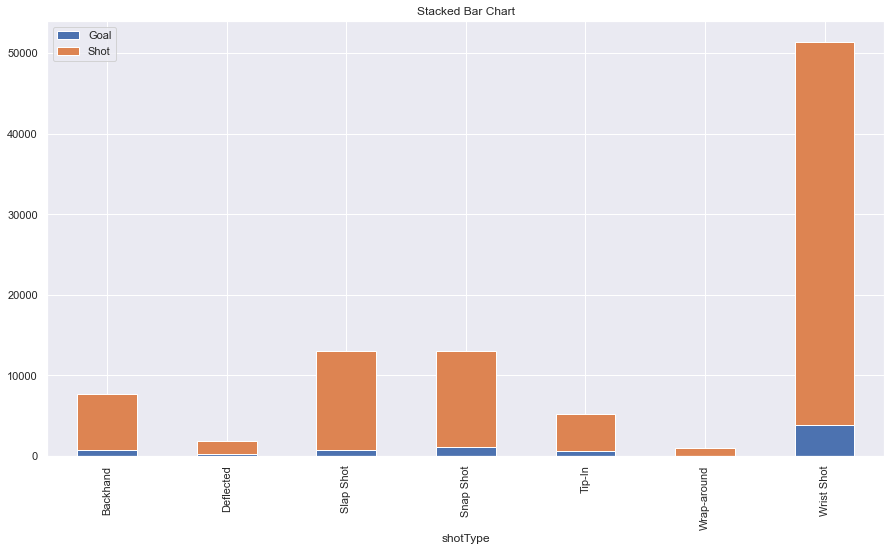

In [86]:
df3 = df.groupby(['shotType'])['isGoal'].count().reset_index(name='count')
df3 = df3.rename(columns={'count': 'Shot'})
print(df3)

new_df = pd.merge(df2, df3, on='shotType')
new_df[['shotType',	'Goal', 'Shot']].plot(x="shotType", kind="bar", stacked=True)

plt.title('Stacked Bar Chart', fontdict=None, loc='center', pad=None)

In [87]:
# the most dangerous type of shot

percent = new_df['Goal']/(new_df['Goal']+new_df['Shot'])*100
print(percent)

0     9.533652
1    12.002096
2     5.893653
3     8.330779
4    13.091330
5     5.537806
6     7.391854
dtype: float64


<h1> Q5.2 </h2>

In [52]:
print(df['coordinates_x'][85934])

-77.0


In [53]:
print(df['coordinates_y'][85934])

7.0


1. Groupby isGoals True
2. Find if coordinates_x is negative/positive
3. If negative calculate distance between (x,y) and (-90,0)
4. If postive calculate distance between (x,y) and (0,90)

In [57]:
df_2018.dropna(inplace =True)
df_2019.dropna(inplace =True)
df_2020.dropna(inplace =True)

0        78.0
1       -37.0
2        47.0
3        53.0
4        77.0
         ... 
85934   -77.0
85935   -69.0
85936   -65.0
85937    42.0
85938    44.0
Name: coordinates_x, Length: 85925, dtype: float64
0        85.0
1       -32.0
2        63.0
3       -59.0
4       -42.0
         ... 
76615   -59.0
76616   -81.0
76617    34.0
76618    31.0
76619    77.0
Name: coordinates_x, Length: 76607, dtype: float64
0       -74.0
1        49.0
2       -52.0
3        43.0
4       -53.0
         ... 
57729    57.0
57730    56.0
57731   -45.0
57732   -77.0
57733   -77.0
Name: coordinates_x, Length: 57730, dtype: float64
1825 1648 1380 948 1138 223 130 114
12042 15442 16876 11468 11227 3887 1236 1087
1825
13867


[Text(0.5, 0, 'Distance'), Text(0, 0.5, 'isGoal')]

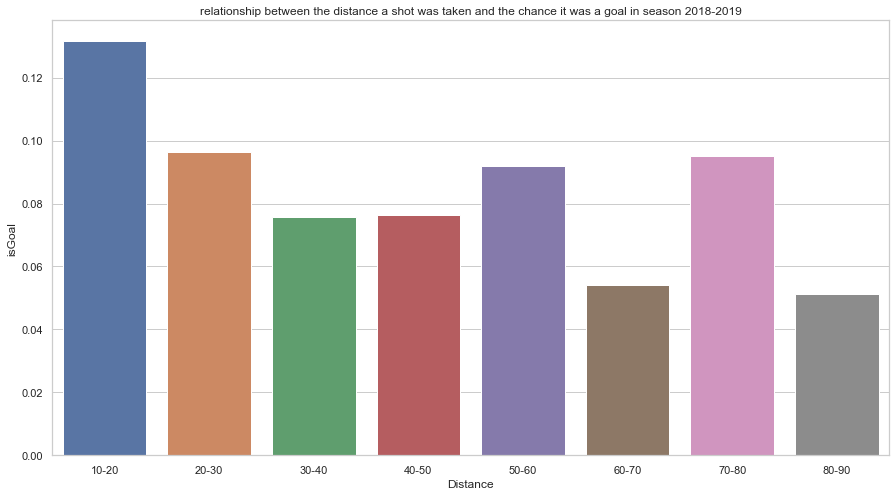

In [60]:
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
def euclidean_distance(a,b,c): #b => 
    print(b)
    lst = []
    for i in b:
        if i < 0:
            x_dist = a[0]-i
        else:
            x_dist = -a[0]-i
        lst.append(x_dist)
    new_lst = pd.Series(lst)
    dst = np.sqrt((new_lst)**2 + (a[1]-c)**2)
    return dst
#print(df2)
opponent_coordinate = [-90,0]


df_2018['Distance'] = euclidean_distance(opponent_coordinate, df_2018.coordinates_x.astype(float), df_2018.coordinates_y.astype(float))
df_2019['Distance'] = euclidean_distance(opponent_coordinate, df_2019.coordinates_x.astype(float), df_2019.coordinates_y.astype(float))
df_2020['Distance'] = euclidean_distance(opponent_coordinate, df_2020.coordinates_x.astype(float), df_2020.coordinates_y.astype(float))

aa=0
ab=0
ac=0
ad=0
a=0
b=0
c=0
d=0

for i in np.array(df_2018[df_2018['isGoal'] == True]['Distance']):
    if i > 10 and i<20:
        aa+= 1
    if i > 20 and i<30:
        ab+= 1
    if i > 30 and i<40:
        ac+= 1
    if i > 40 and i<50:
        ad+= 1
    if i > 50 and i < 60:
        a+= 1
    if i >60 and i< 70:
        b+= 1
    if i >70 and i <80:
        c+= 1
    if i>80 and i<90:
        d+=1

print(aa,ab,ac,ad,a,b,c,d, )
lst = [aa,ab,ac,ad,a,b,c,d]

xa = 0
xb=0
xc=0
xd=0
xe=0
xf=0
xg=0
xh=0

for i in np.array(df_2018[df_2018['isGoal'] == False]['Distance']):
    if i > 10 and i<20:
        xa+= 1
    if i > 20 and i<30:
        xb+= 1
    if i > 30 and i<40:
        xc+= 1
    if i > 40 and i<50:
        xd+= 1
    if i > 50 and i < 60:
        xe+= 1
    if i >60 and i< 70:
        xf+= 1
    if i >70 and i <80:
        xg+= 1
    if i>80 and i<90:
        xh+=1
print(xa, xb, xc, xd, xe, xf,xg, xh )

print(aa)
print(aa+xa)
prob_1 = aa/(aa+xa)
prob_2 = ab/(ab+xb)
prob_3 = ac/(ac+xc)
prob_4 = ad/(ad+xd)
prob_5 = a/(a+xe)
prob_6 = b/(b+xf)
prob_7 = c/(c+xg)
prob_8 = d/(a+xh)
lst = [prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8]

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90' ], y=lst, data=df_2018)
ax.set_title('relationship between the distance a shot was taken and the chance it was a goal in season 2018-2019')
ax.set(xlabel="Distance", ylabel = "isGoal")


1796 1446 1154 808 881 190 85 88
11156 12386 13994 10303 10607 4251 1082 1034
1796
12952


[Text(0.5, 0, 'Distance'), Text(0, 0.5, 'isGoal')]

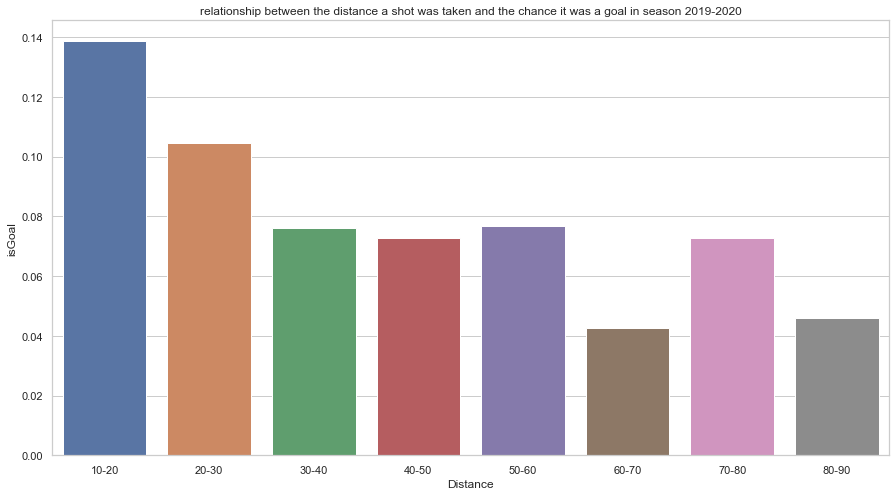

In [61]:
aa=0
ab=0
ac=0
ad=0
a=0
b=0
c=0
d=0

for i in np.array(df_2019[df_2019['isGoal'] == True]['Distance']):
    if i > 10 and i<20:
        aa+= 1
    if i > 20 and i<30:
        ab+= 1
    if i > 30 and i<40:
        ac+= 1
    if i > 40 and i<50:
        ad+= 1
    if i > 50 and i < 60:
        a+= 1
    if i >60 and i< 70:
        b+= 1
    if i >70 and i <80:
        c+= 1
    if i>80 and i<90:
        d+=1

print(aa,ab,ac,ad,a,b,c,d, )
lst = [aa,ab,ac,ad,a,b,c,d]

xa = 0
xb=0
xc=0
xd=0
xe=0
xf=0
xg=0
xh=0

for i in np.array(df_2019[df_2019['isGoal'] == False]['Distance']):
    if i > 10 and i<20:
        xa+= 1
    if i > 20 and i<30:
        xb+= 1
    if i > 30 and i<40:
        xc+= 1
    if i > 40 and i<50:
        xd+= 1
    if i > 50 and i < 60:
        xe+= 1
    if i >60 and i< 70:
        xf+= 1
    if i >70 and i <80:
        xg+= 1
    if i>80 and i<90:
        xh+=1
print(xa, xb, xc, xd, xe, xf,xg, xh )

print(aa)
print(aa+xa)
prob_1 = aa/(aa+xa)
prob_2 = ab/(ab+xb)
prob_3 = ac/(ac+xc)
prob_4 = ad/(ad+xd)
prob_5 = a/(a+xe)
prob_6 = b/(b+xf)
prob_7 = c/(c+xg)
prob_8 = d/(a+xh)
lst = [prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8]

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90' ], y=lst, data=df_2019)
ax.set_title('relationship between the distance a shot was taken and the chance it was a goal in season 2019-2020')
ax.set(xlabel="Distance", ylabel = "isGoal")

1507 1091 883 558 565 114 57 65
8714 9396 10009 7805 8090 3100 685 657
1507
10221


[Text(0.5, 0, 'Distance'), Text(0, 0.5, 'isGoal')]

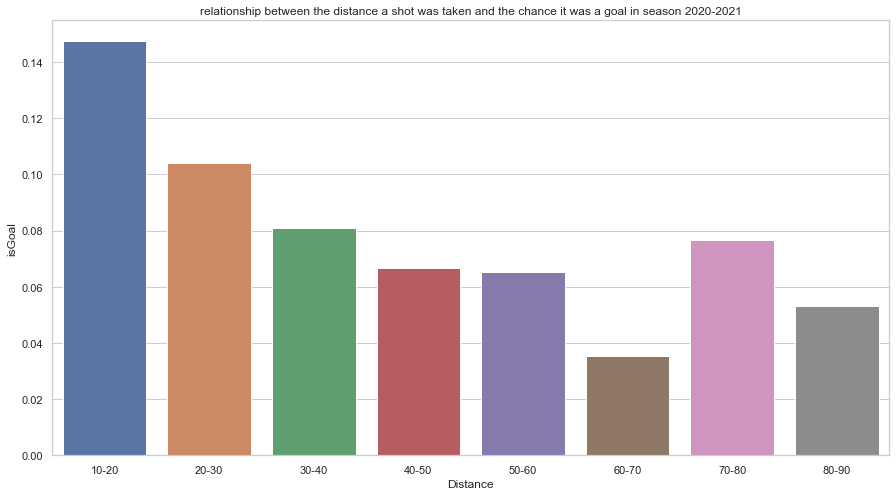

In [62]:
aa=0
ab=0
ac=0
ad=0
a=0
b=0
c=0
d=0

for i in np.array(df_2020[df_2020['isGoal'] == True]['Distance']):
    if i > 10 and i<20:
        aa+= 1
    if i > 20 and i<30:
        ab+= 1
    if i > 30 and i<40:
        ac+= 1
    if i > 40 and i<50:
        ad+= 1
    if i > 50 and i < 60:
        a+= 1
    if i >60 and i< 70:
        b+= 1
    if i >70 and i <80:
        c+= 1
    if i>80 and i<90:
        d+=1

print(aa,ab,ac,ad,a,b,c,d, )
lst = [aa,ab,ac,ad,a,b,c,d]

xa = 0
xb=0
xc=0
xd=0
xe=0
xf=0
xg=0
xh=0

for i in np.array(df_2020[df_2020['isGoal'] == False]['Distance']):
    if i > 10 and i<20:
        xa+= 1
    if i > 20 and i<30:
        xb+= 1
    if i > 30 and i<40:
        xc+= 1
    if i > 40 and i<50:
        xd+= 1
    if i > 50 and i < 60:
        xe+= 1
    if i >60 and i< 70:
        xf+= 1
    if i >70 and i <80:
        xg+= 1
    if i>80 and i<90:
        xh+=1
print(xa, xb, xc, xd, xe, xf,xg, xh )

print(aa)
print(aa+xa)
prob_1 = aa/(aa+xa)
prob_2 = ab/(ab+xb)
prob_3 = ac/(ac+xc)
prob_4 = ad/(ad+xd)
prob_5 = a/(a+xe)
prob_6 = b/(b+xf)
prob_7 = c/(c+xg)
prob_8 = d/(a+xh)
lst = [prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8]

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90' ], y=lst, data=df_2020)
ax.set_title('relationship between the distance a shot was taken and the chance it was a goal in season 2020-2021')
ax.set(xlabel="Distance", ylabel = "isGoal")

<h1> Q5.3 </h2>

In [72]:
no_of_shots_2019 = df_2019[df_2019['isGoal']==False][['isGoal','shotType']].groupby('shotType',as_index = False).agg('count').sort_values(by='shotType')

no_of_shots_2019

,shotType,isGoal
0,Backhand,5422
1,Deflected,1275
2,Slap Shot,10371
3,Snap Shot,9159
4,Tip-In,3389
5,Wrap-around,648
6,Wrist Shot,38990


In [73]:
no_of_goals_2019 = df_2019[df_2019['isGoal']==True][['isGoal','shotType']].groupby('shotType',as_index = False).agg('count').sort_values(by='shotType')

no_of_goals_2019

,shotType,isGoal
0,Backhand,738
1,Deflected,229
2,Slap Shot,767
3,Snap Shot,1087
4,Tip-In,678
5,Wrap-around,52
6,Wrist Shot,3802


In [74]:
score_2019 = no_of_goals_2019.isGoal/no_of_shots_2019.isGoal*100
print(score_2019)

0    13.611214
1    17.960784
2     7.395622
3    11.868108
4    20.005901
5     8.024691
6     9.751218
Name: isGoal, dtype: float64


In [99]:
dist = df_2019[['shotType','Distance']].groupby('shotType',as_index= False).agg('mean').sort_values(by='shotType')
dist

,shotType,Distance
0,Backhand,29.130054
1,Deflected,29.612325
2,Slap Shot,41.517683
3,Snap Shot,36.138609
4,Tip-In,27.202327
5,Wrap-around,24.142711
6,Wrist Shot,36.337328


In [76]:
dist = pd.concat((dist, score_2019),axis = 1)

In [77]:
dist.sort_values(by = 'isGoal', inplace = True)

Text(0.5, 1.0, 'goal percentage (# goals / # shots) as a function of both distance from the net, and the category of shot types ')

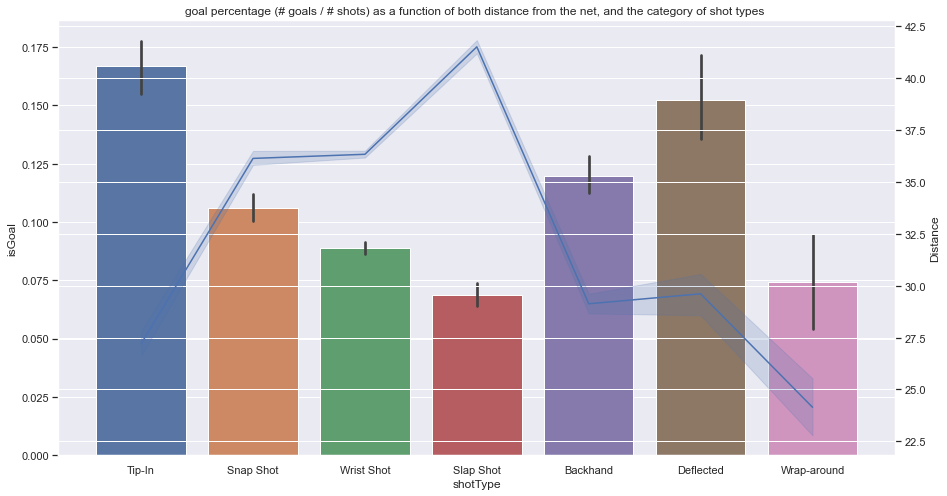

In [82]:
#sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='shotType', y='isGoal',data=df_2019)
ax1 = ax.twinx()
sns.lineplot(x='shotType', y='Distance',data=df_2019).set_title('goal percentage (# goals / # shots) as a function of both distance from the net, and the category of shot types ')




            A         B         C         D
aaa  0.401956  0.522082  1.379257  0.623748
bbb  0.540971  0.234134  0.631068  0.060675
ccc  0.625450  0.560036  0.243657  1.054221
ddd  1.440124  0.003560  1.960113  0.116446
eee  0.934890  1.769551  0.734464  1.395880


<AxesSubplot:>

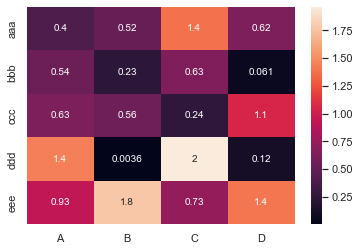

In [98]:
# result = df_2019.pivot(index='isGoal', columns='Distance', values='shotType')

# sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
# plt.show()

import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

print(df)

sns.heatmap(df, annot=True)

In [ ]:
# 1) df_2019 + column of distance + distance category
# df2 = ...groupby(distance category and shot type).calculate goal percentage



In [100]:
df_2019

# distance category 10-20 , 20- 30,  it should append there

#df2 = ...groupby(distance category and shot type) and then calculate goal percentage

,game_id,event_idx,period,periodTime,teamInfo,isGoal,shotType,coordinates_x,coordinates_y,shooter,goalie,emptyNet,strength,awayTeam,homeTeam,Distance
0,2019020001,4,1,00:25,Ottawa Senators,True,Tip-In,85.0,-1.0,Brady Tkachuk,Frederik Andersen,False,EVEN,Ottawa Senators,Toronto Maple Leafs,5.099020
1,2019020001,12,1,01:31,Toronto Maple Leafs,False,Snap Shot,-32.0,-2.0,Morgan Rielly,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs,58.034473
2,2019020001,19,1,03:23,Ottawa Senators,False,Snap Shot,63.0,-6.0,Dylan DeMelo,Frederik Andersen,False,NA,Ottawa Senators,Toronto Maple Leafs,27.658633
3,2019020001,22,1,03:56,Toronto Maple Leafs,False,Wrist Shot,-59.0,-20.0,Morgan Rielly,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs,36.891733
4,2019020001,27,1,04:47,Toronto Maple Leafs,False,Slap Shot,-42.0,-29.0,Tyson Barrie,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs,56.080300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76615,2019030416,319,3,16:01,Tampa Bay Lightning,False,Snap Shot,-59.0,-24.0,Anthony Cirelli,Anton Khudobin,False,NA,Tampa Bay Lightning,Dallas Stars,NaN
76616,2019030416,326,3,17:20,Tampa Bay Lightning,False,Wrist Shot,-81.0,3.0,Blake Coleman,Anton Khudobin,False,NA,Tampa Bay Lightning,Dallas Stars,NaN
76617,2019030416,333,3,18:50,Dallas Stars,False,Snap Shot,34.0,-6.0,John Klingberg,Andrei Vasilevskiy,False,NA,Tampa Bay Lightning,Dallas Stars,NaN
76618,2019030416,341,3,19:27,Dallas Stars,False,Wrist Shot,31.0,10.0,John Klingberg,Andrei Vasilevskiy,False,NA,Tampa Bay Lightning,Dallas Stars,NaN


# Advanced Visualizations: Shot Maps (30%)

The final set of visualizations that you will create are shot maps for a given NHL team, for a given year and season. This will be much easier If you’ve completed the bonus task of creating an interactive debugging tool and drew the event coordinates on the ice rink. A great example of these plots, with a detailed description of how to read them, can be found on the [hockeyviz website](https://hockeyviz.com/howto/shotMap) (which is a great resource for many things about hockey data science). Note that you will have to create these figures from scratch; for this milestone you cannot use any library that generates domain specific (hockey) figures for you. You will be provided with a sample ice rink image that has the correct ratio.

To create these figures, you must:
- Ensure you can work with the event coordinates correctly. This includes ensuring the shots are on the correct side of the rink (due to period changes, or start on different sides during a game), as well as being able to map from physical coordinates to pixel coordinates on the figure.
- Compute aggregate statistics of shot locations across the entire league to compute league averages
Group shots by team, and use the league averages computed above to compute the excess shots per hour. You can choose to represent this as either a raw difference in goals between the teams, or a percentage. 
- Make appropriate choices to bin your data when displaying it. You could also consider using smoothing techniques to make your shot maps more readable. A common strategy is to use kernel density estimation with a Gaussian kernel.
- Make the plot interactive, with options to select the team and season. The easiest way to do this is using something like plotly or bokeh. A nice simple demo of what you could do with plotly can be found [here](https://plotly.com/python/dropdowns/).

## Questions

1. [Export the plot to HTML](https://plotly.com/python/interactive-html-export/), and embed it into your blog post. Your plot must allow users to select any season between 2016-17 and 2020-2021, as well as any team during the selected season. 
*Note: Because you can find these figures on the internet, answering these questions without producing these figures will not get you any marks!*

2. Discuss (in a few sentences) what you can interpret from these plots.

3. Consider the Colorado Avalanche; take a look at their shot map during the 2016-17 season. Discuss what you could say about the team during this season. Now look at the shot map for the Colorado Avalanche for the 2020-21 season, and discuss what you could conclude from these differences. Does this make sense? Hint: look at the standings.

4. Consider the Buffalo Sabres, which have been a team that has struggled over recent years, and compare them to the Tampa Bay Lightning, a team which has won the Stanley for the past two years in a row. Look at the shot maps for these two teams from the 2018-19, 2019-20, and 2020-21 seasons. Discuss what observations you can make. Is there anything that could explain the Lightning’s success, or the Sabres’ struggles? How complete of a picture do you think this paints?

*Note: the point of this exercise is to get you comfortable with using the standard Python libraries to create visualizations. You cannot use any tool that creates domain-specific (i.e. hockey) visualizations for you. You are free to rely on stock libraries (matplotlib, seaborn, plotly, bokeh, etc) to generate these plots.*



In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
# check seaborn version here
import seaborn as sns

print('seaborn version: ',sns.__version__)

import plotly.graph_objects as go

from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

from ift6758.data.tidyData import tidyData
from ift6758.data.functions import *

from scipy.ndimage import gaussian_filter

#import image of hockey ring
from PIL import Image
img = Image.open('./figures/nhl_rink.png')

# widget and interactions

In [ ]:
#pre-load all years may crash if low on memory (used for widgets)
nYear = 3 #define number of years of games to import (from 2016) eg. 5= 2016-2021
binned_gridi,dfs_tidyi,Teamnamesi = load_genGridi(nYear)

In [ ]:
#initilize values
sType ='Both'
year = 2016
contourN = 12
selected_team='Toronto Maple Leafs'

#print(Teamnames) 
#load only one year
#binned_grid,dfs_tidy,Teamnames = load_genGrid(year, sType)

team_binned_grid = genTeamGrid(binned_gridi[str(year)],dfs_tidyi[str(year)],Teamnamesi[str(year)],selected_team)
#team_binned_grid = genTeamGrid(binned_grid,dfs_tidy,Teamnames,selected_team)
colorscale,minG,maxG = setContour(team_binned_grid,contourN)


#year selector
wYear = widgets.Dropdown(
    options=list(range(2016,2016+nYear)),
    value=2016,
    description='Year: ',
)

#Team selector
wTeam = widgets.Dropdown(
    description='Team: ',
    value='Toronto Maple Leafs',
    options=Teamnamesi[str(year)]
)

#game type selector
wType = widgets.Dropdown(
    options=['Both','Regular', 'PlayOffs'],
    value='Both',
    description='Game Type:',
)

#contour selector
wCont = widgets.IntSlider(
        value=8,
        min=1,
        max=20,
        step=1,
        description='Contours:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
)

container = widgets.HBox(children=[wYear, wType])
container2 = widgets.HBox([wTeam, wCont])

# Assign an empty figure widget with two traces
trace1 =go.Contour(
        z=team_binned_grid,
        connectgaps=False,
        colorbar=dict(title='Shots difference vs Avg',
                      titleside='right',nticks=contourN,tickfont_size=10
                     ),
        colorscale = colorscale,
        contours=dict(
            start=minG,
            end=maxG,
            size=(maxG-minG)/contourN,
       ),
       line_smoothing=0.85
    )

g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title={
                                'text': f"Heatmap of shots from {wTeam.value} across {wYear.value} vs Avg",
                                # 'y':0,
                                'x':0.5,
                                'xanchor': 'center',
                                'yanchor': 'top'},
                        xaxis_title="",
                        yaxis_title="",
                        images=[dict(
                                source=img,
                                xref="x",
                                yref="y",
                                x=0,
                                y=85,
                                sizex=200,
                                sizey=85,
                                sizing="stretch",
                                opacity=0.2,
                                layer="above"
                        )]
                    )
                   )

# Define a function that updates the content of GameIndex based on GameType 
# REQUIRED TO RUN FIRST--> load_genGridi()
def response(change):
    #grab input values
    
    
    #if year changed then load new year data
    if change['new'] in list(range(2016,2016+nYear)) :
        #load new data
        #update team options
        wTeam.options = Teamnamesi[str(wYear.value)]
        wTeam.value = wTeam.options[0]
        team_binned_grid = genTeamGrid(binned_gridi[str(wYear.value)],
                                       dfs_tidyi[str(wYear.value)],
                                       wTeam.options,
                                       wTeam.value)
        colorscale,minG,maxG = setContour(team_binned_grid,wCont.value)

    #if seasontype changed then load new year stats
    #currently doesn't work for Regular or PlayOffs seperatly
    elif change['new'] in ['Both','Regular', 'PlayOffs']:
        pass
        #load new data
        #update team options
        wTeam.options = Teamnamesi[str(wYear.value)]
        wTeam.value = wTeam.options[0]
        team_binned_grid = genTeamGrid(binned_gridi[str(wYear.value)],
                                       dfs_tidyi[str(wYear.value)],
                                       wTeam.options,
                                       wTeam.value)
        colorscale,minG,maxG = setContour(team_binned_grid,wCont.value)

    #if teamname changed then load new team stats
    elif change['new'] in wTeam.options:
        #load new data
        #update team options
        team_binned_grid = genTeamGrid(binned_gridi[str(wYear.value)],
                                       dfs_tidyi[str(wYear.value)],
                                       wTeam.options,
                                       wTeam.value)
        colorscale,minG,maxG = setContour(team_binned_grid,wCont.value)
        
    #if contour number changed then update contours
    elif change['new'] in list(range(1,21)):
        team_binned_grid = genTeamGrid(binned_gridi[str(wYear.value)],
                                       dfs_tidyi[str(wYear.value)],
                                       wTeam.options,
                                       wTeam.value)
        colorscale,minG,maxG = setContour(team_binned_grid,wCont.value)
        
    else:
        raise Exception('selection out of bounds')
    
    #debug
    #with output2:
    #    print(change['new'],wType.value,wYear.value,wTeam.value,wCont.value)

    
    with g.batch_update():
            g.data[0].z = team_binned_grid
            g.data[0].colorbar = dict(title='Shots difference vs Avg',
                      titleside='right',nticks=wCont.value,tickfont_size=10
                     )
            g.data[0].colorscale = colorscale
            g.data[0].contours = dict(
                                    start=minG,
                                    end=maxG,
                                    size=(maxG-minG)/wCont.value,
                                    )
            g.layout.title={'text': f"Heatmap of shots from {wTeam.value} across {wYear.value} vs Avg",
                                # 'y':0,
                                'x':0.5,
                                'xanchor': 'center',
                                'yanchor': 'top'}
            
            
wType.observe(response, names='value')
wTeam.observe(response, names='value')
wYear.observe(response, names='value')
wCont.observe(response, names='value')

output2 = widgets.Output()

display(widgets.VBox([container, container2,output2, g]))

